In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [3]:
import pathlib
dataset_url = "/content/drive/MyDrive/Verzeo ML02-MB11/Phase 3 and 4/Old directory"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url)
data_dir = pathlib.Path(dataset_url)
len(list(data_dir.glob('*/*/*')))

2692

In [4]:
batch_size = 3
img_height = 180
img_width = 180

class_names = ['Foreigner-Images', 'Indian-Images']

In [5]:
train_ds = ImageDataGenerator(rescale= 1/255, validation_split=0.2)
val_ds = ImageDataGenerator(rescale= 1/255, validation_split=0.2)

In [6]:
training_dataset = train_ds.flow_from_directory(
    dataset_url,
    target_size = (180,180),
    batch_size = 64,
    subset='training',
    classes = ['Foreigner-Images', 'Indian-Images'],
    class_mode = 'binary',
    shuffle = True
    )
validation_dataset = val_ds.flow_from_directory(
    dataset_url,
    target_size = (180,180),
    batch_size = 16,
    subset='validation',
    classes = ['Foreigner-Images', 'Indian-Images'],
    class_mode = 'binary',
    shuffle = True
    )

Found 2154 images belonging to 2 classes.
Found 538 images belonging to 2 classes.


In [7]:
data = training_dataset.classes.tolist()
print(data.count(0))
print(data.count(1))

data = validation_dataset.classes.tolist()
print(data.count(0))
print(data.count(1))

804
1350
201
337


In [8]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(180, 180, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    # tf.keras.layers.MaxPooling2D(2,2),
                                    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    # tf.keras.layers.MaxPooling2D(2,2),
                                    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    # tf.keras.layers.MaxPooling2D(2,2),
                                    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    # tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=0.0001),
    metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 126736)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               64889344  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 65,021,377
Trainable params: 65,021,377
Non-trainable params: 0
____________________________________________

In [9]:
history = model.fit(training_dataset,
                    steps_per_epoch=32,
                    epochs=20,
                    verbose=1,
                    validation_data = validation_dataset,
                    validation_steps=8)

Epoch 1/20
32/32 [==============================] - 1109s 34s/step - loss: 1.4096 - accuracy: 0.5204 - val_loss: 0.7233 - val_accuracy: 0.4609
Epoch 2/20
32/32 [==============================] - 92s 3s/step - loss: 0.6851 - accuracy: 0.5965 - val_loss: 0.8060 - val_accuracy: 0.5781
Epoch 3/20
32/32 [==============================] - 46s 1s/step - loss: 0.7034 - accuracy: 0.5950 - val_loss: 0.6991 - val_accuracy: 0.5078
Epoch 4/20
32/32 [==============================] - 32s 1s/step - loss: 0.6495 - accuracy: 0.6257 - val_loss: 0.7419 - val_accuracy: 0.4531
Epoch 5/20
32/32 [==============================] - 26s 825ms/step - loss: 0.6232 - accuracy: 0.6349 - val_loss: 0.6208 - val_accuracy: 0.6562
Epoch 6/20
32/32 [==============================] - 20s 649ms/step - loss: 0.5810 - accuracy: 0.6985 - val_loss: 0.6738 - val_accuracy: 0.5938
Epoch 7/20
32/32 [==============================] - 19s 613ms/step - loss: 0.5694 - accuracy: 0.7042 - val_loss: 0.6911 - val_accuracy: 0.6094
Epoch 8/

In [10]:
model.evaluate(training_dataset)
model.evaluate(validation_dataset)

34/34 [==============================] - 3s 85ms/step - loss: 0.9085 - accuracy: 0.5911


[0.9084504842758179, 0.5910780429840088]

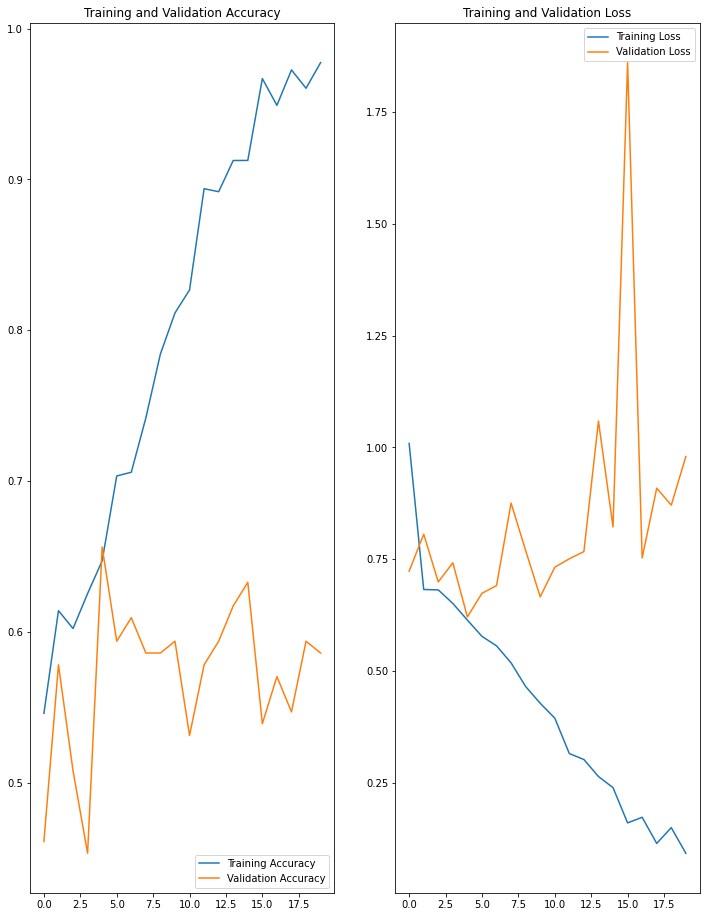

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 16))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

[1.]
This is a Indian


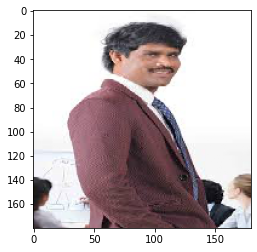

In [12]:
test_path = "/content/drive/MyDrive/Verzeo ML02-MB11/Phase 3 and 4/Old directory/Indian-Images/buisnessman/Businessmen-23.png"

img = image.load_img(test_path, target_size=(180, 180))
x = image.img_to_array(img)
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]<0.5:
  print("This is a Foringer")
else:
  print("This is a Indian")

[1.]
This is a Indian


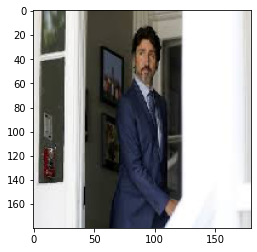

In [13]:
test_path = "/content/drive/MyDrive/Verzeo ML02-MB11/Phase 3 and 4/Old directory/Foreigner-Images/non-indian images/Canadian-120.jpg"

img = image.load_img(test_path, target_size=(180, 180))
x = image.img_to_array(img)
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]<0.5:
  print("This is a Foringer")
else:
  print("This is a Indian")

In [15]:
!mkdir -p saved_model
model.save('saved_model/my_model.h5')

In [16]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('saved_model/my_model.h5')

# Show the model architecture
new_model.summary()

new_model.evaluate(validation_dataset, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 126736)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               64889344  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 65,021,377
Trainable params: 65,021,377
Non-trainable params: 0
____________________________________________

[0.9084504246711731, 0.5910780429840088]

This is a Foringer


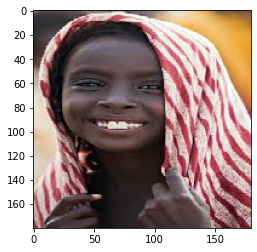

In [17]:
test_path = "/content/drive/MyDrive/Verzeo ML02-MB11/Phase 3 and 4/Old directory/Foreigner-Images/non-indian images/African-1.jpg"

img = image.load_img(test_path, target_size=(180, 180))
x = image.img_to_array(img)
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = new_model.predict(images, batch_size=10)

if classes[0]<0.5:
  print("This is a Foringer")
else:
  print("This is a Indian")

This is a Indian


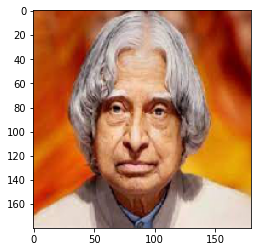

In [18]:
test_path = "/content/drive/MyDrive/Verzeo ML02-MB11/Phase 3 and 4/Old directory/Indian-Images/Astronauts and Scientists/Astronauts-1.png"

img = image.load_img(test_path, target_size=(180, 180))
x = image.img_to_array(img)
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = new_model.predict(images, batch_size=10)

if classes[0]<0.5:
  print("This is a Foringer")
else:
  print("This is a Indian")